In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [72]:
d = np.load("results/country_scale.npz")

In [73]:
coords = d["locs"]
ssis = d["ssis"]

In [74]:
ssis.shape

(50000,)

In [75]:
lons, lats = coords[:,1] * (180 / np.pi), coords[:,0] * (180 / np.pi)

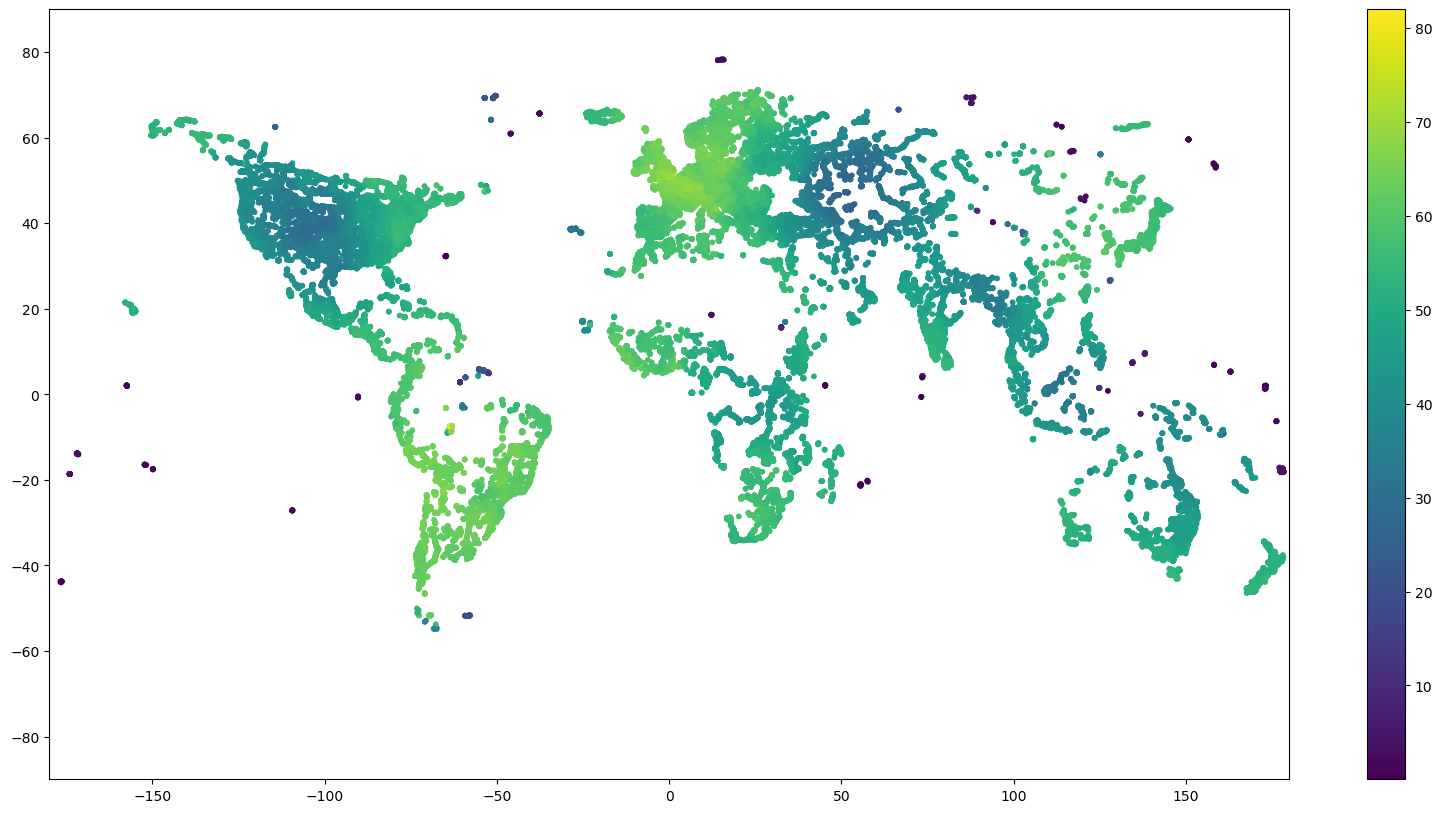

In [76]:
plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=ssis, s=10)
plt.colorbar()

In [11]:
import pandas as pd

In [12]:
accs = pd.read_csv("data/results_01_gt.csv")

In [13]:
accs

,subdir,Image_File,Rank,lat,lon,Probability,id,gt_latitude,gt_longitude,gt_unique_city,haversine_distance_km
0,1,469933861710483.jpg,1,62.302471,-145.301392,0.121045,469933861710483,54.368778,-126.740705,Houston_NaN_British Columbia_CA,1388.511677
1,1,479599979764616.jpg,1,44.729904,-105.900520,0.250336,479599979764616,48.619168,-109.741770,Havre_Hill County_Montana_US,522.261096
2,1,503553647439728.jpg,1,18.507992,-69.879639,0.013630,503553647439728,1.458811,110.421959,Kuching_NaN_Sarawak_MY,17794.659148
3,1,885812221998611.jpg,1,9.416548,6.954345,0.026898,885812221998611,5.854320,15.848631,Baoro_NaN_Nana-Mambere_CF,1057.067228
4,1,994191198099766.jpg,1,-24.634535,31.541748,0.052108,994191198099766,-25.031709,31.795419,Komatipoort_Ehlanzeni District_Mpumalanga_ZA,51.046459
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,903665756847754.jpg,1,35.258327,-112.124580,0.119026,903665756847754,35.762002,-105.009464,Las Vegas_San Miguel County_New Mexico_US,646.305158
49996,1,294016359068752.jpg,1,-39.272663,-71.972183,0.073266,294016359068752,-45.403290,-72.688521,Puerto Aisen_Provincia de Aisen_Aisen_CL,684.225081
49997,1,474425317168914.jpg,1,-30.069094,138.279068,0.150715,474425317168914,-28.841949,138.520191,The Sill_NaN_South Australia_AU,138.435052
49998,1,2979415788947114.jpg,1,39.582870,32.149818,0.204675,2979415788947114,38.779107,34.573742,Gulsehir_NaN_Nevsehir_TR,227.229369


In [19]:
probs = accs["Probability"]
dists = accs["haversine_distance_km"]

In [77]:
normed_ssis = ssis / 100
normed_dists = dists / 18000

In [78]:
binary_dists = np.zeros_like(dists)
binary_dists[dists > 750] = 1
binary_dists[dists <= 750] = 0

In [79]:
binary_ssis = np.zeros_like(ssis)
binary_ssis[normed_ssis > 0.5] = 1
binary_ssis[normed_ssis <= 0.5] = 0

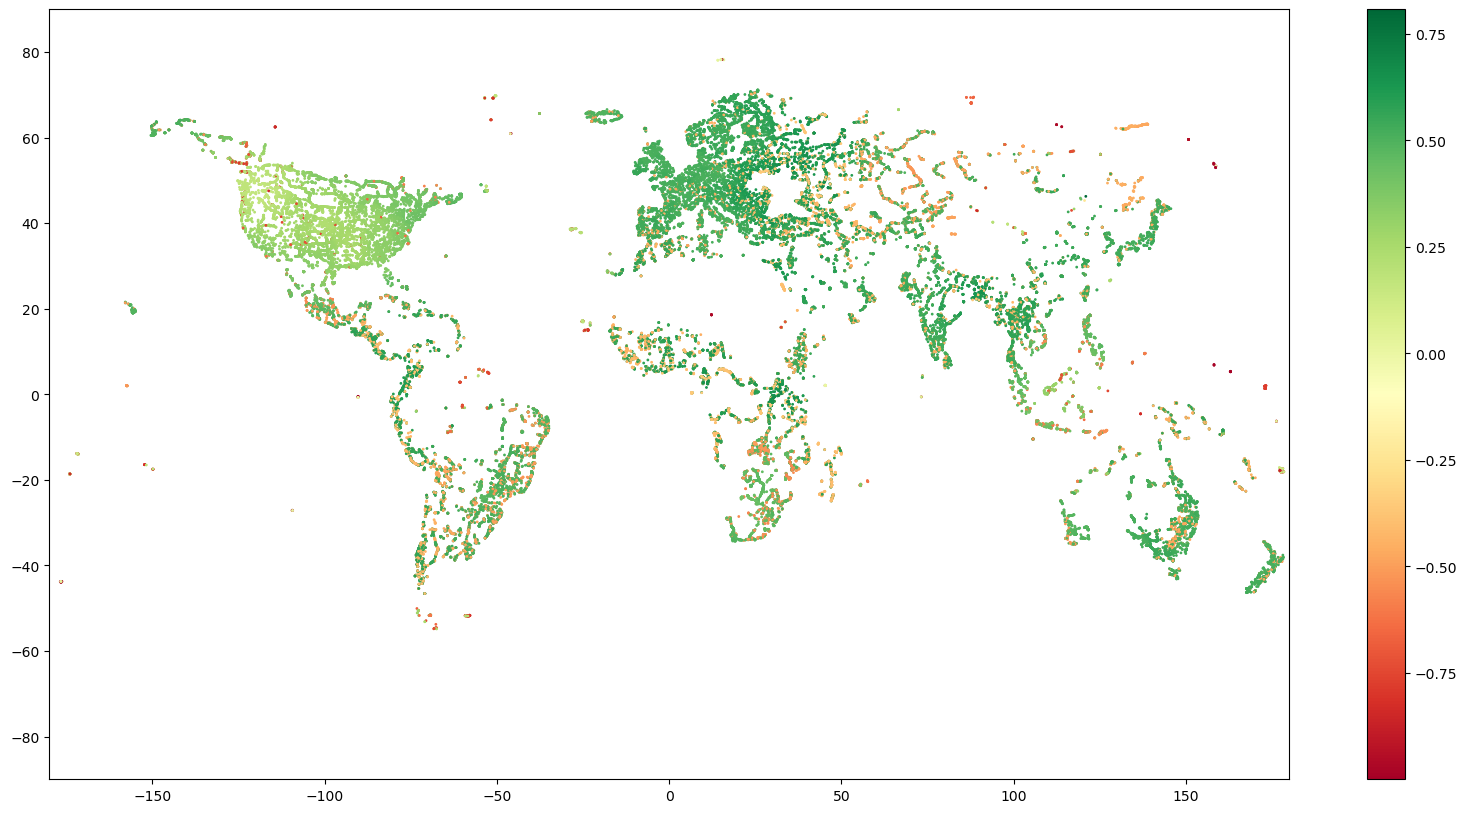

In [27]:
plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=normed_ssis - binary_dists, s=1, cmap="RdYlGn")
plt.colorbar()

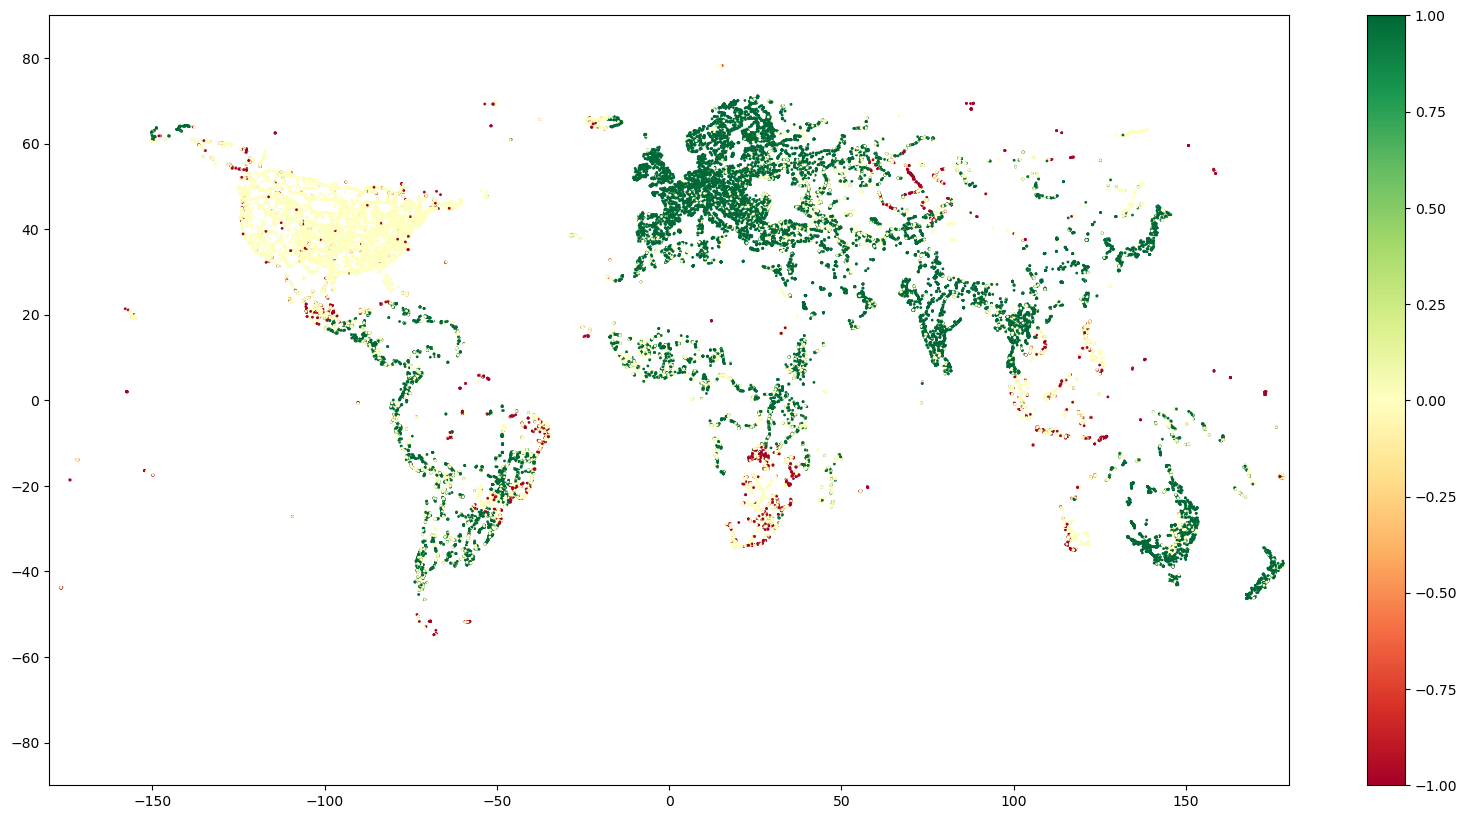

In [38]:
plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=binary_ssis - binary_dists, s=1, cmap="RdYlGn")
plt.colorbar()

In [80]:
binary_labels = np.zeros_like(binary_ssis, dtype=int)
binary_labels[(binary_ssis==0) & (binary_dists==0)] = 0
binary_labels[(binary_ssis==1) & (binary_dists==0)] = 1
binary_labels[(binary_ssis==0) & (binary_dists==1)] = 2
binary_labels[(binary_ssis==1) & (binary_dists==1)] = 3

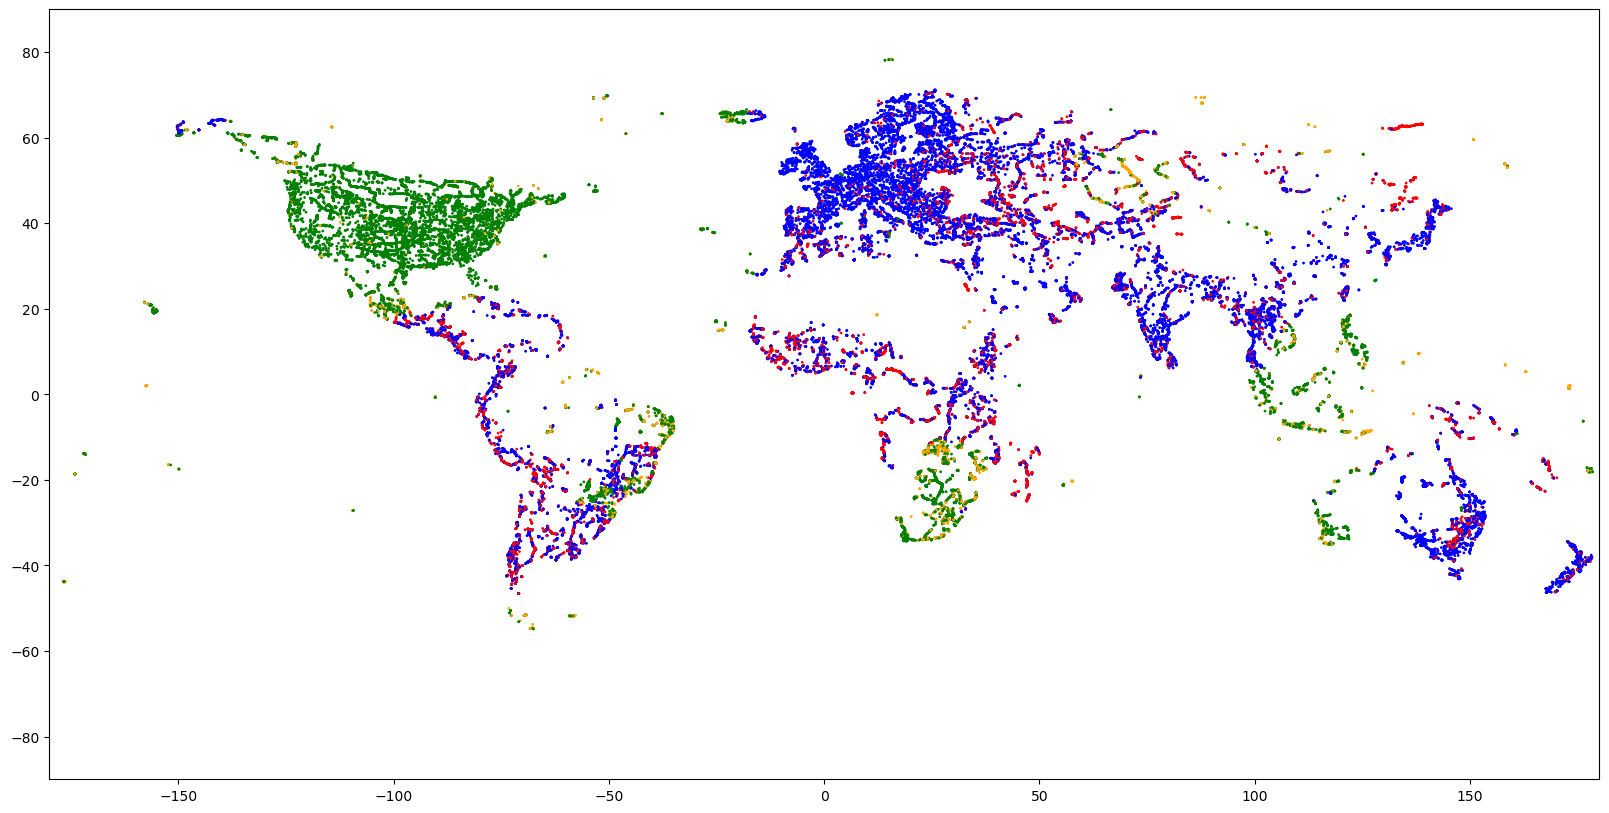

In [51]:
colors = np.array(["green", "blue", "orange", "red"])

plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=colors[binary_labels], s=1)
# plt.colorbar()

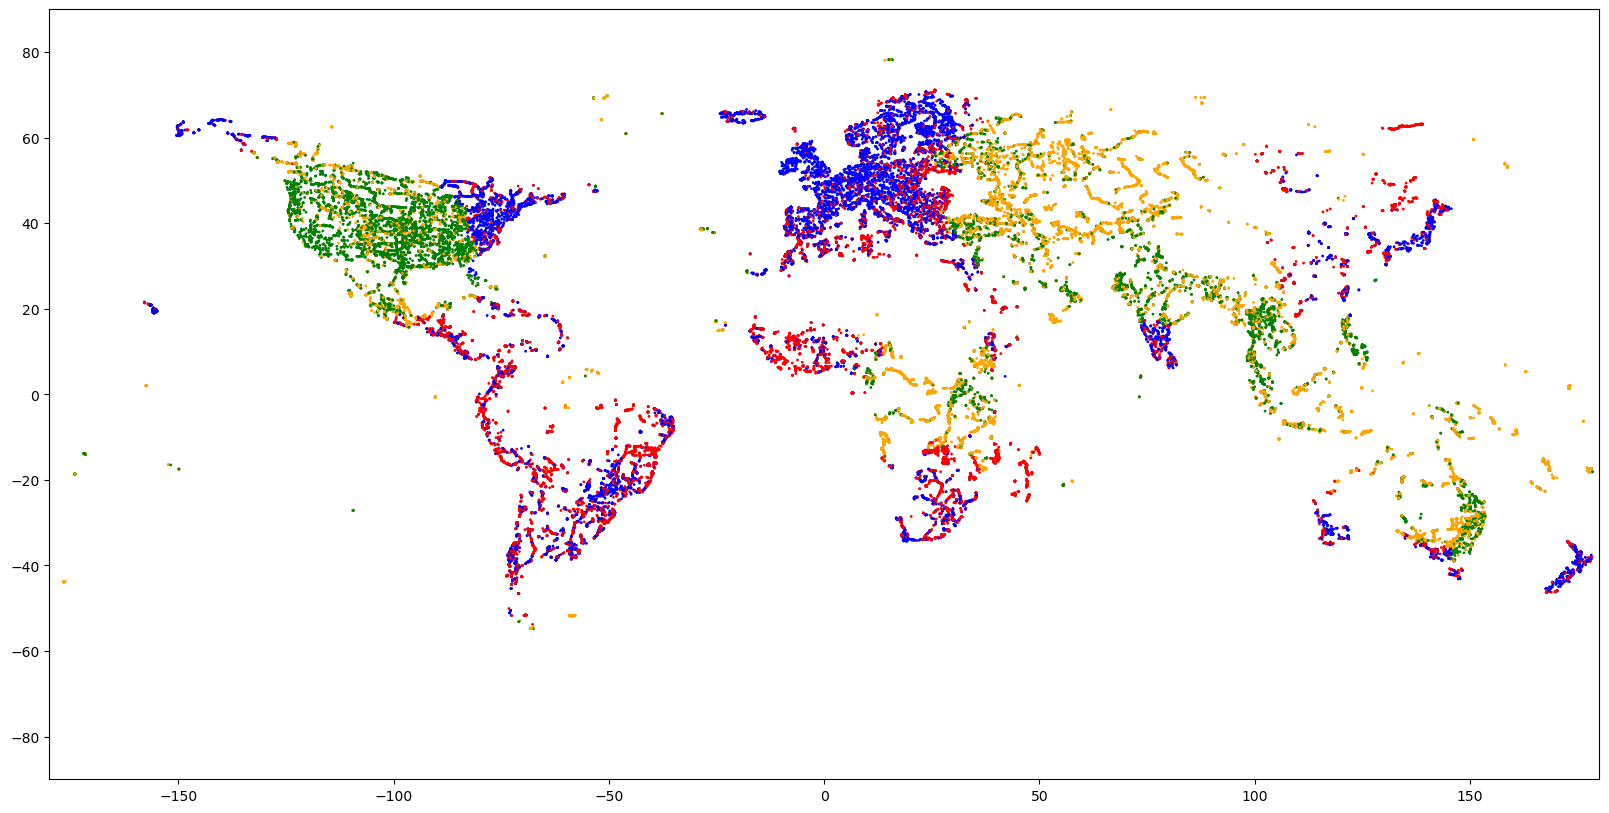

In [81]:
colors = np.array(["green", "blue", "orange", "red"])

plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=colors[binary_labels], s=1)
# plt.colorbar()

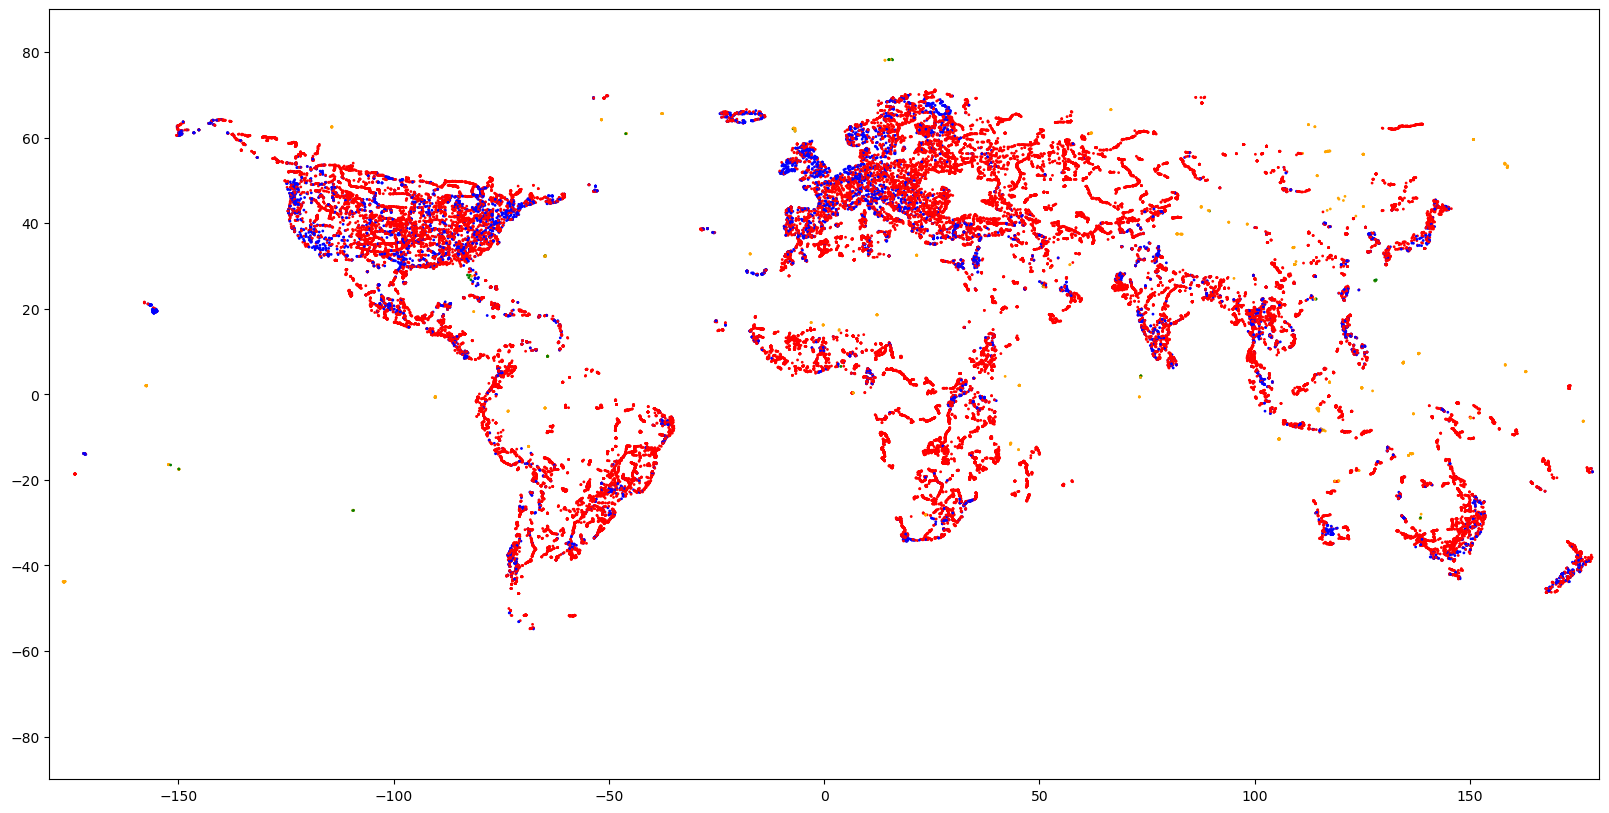

In [71]:
colors = np.array(["green", "blue", "orange", "red"])

plt.figure(figsize=(20, 10))
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.scatter(lons, lats, c=colors[binary_labels], s=1)
# plt.colorbar()